
#### 2) Salary_hike -> Build a prediction model for Salary_hike

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

#### Loading the dataset for building model

In [4]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### <font color= 'Brown'>Performing EDA </font>

### Statistical Details for dataset

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


#### Finding dimenesions of dataset

In [6]:
rows,col=df.shape
print('No of rows',rows ,'and number of columns are ',col)

No of rows 30 and number of columns are  2


##### Checking Data type of the colume 

In [14]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

#### <font color='Brown'>As we can see that the datatype of columns are good.

##### Checking for null values

In [15]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### <font color='Brown'>As we can see that there is no null values in the given dataset.

##### Checking for duplicate values

In [19]:
df.duplicated().sum()

0

##### <font color = 'Brown'> As we can see that there is no invalid values , duplicates or null values in our dataset. We can proceed with further steps. </font>

##### Check if any outliers exist

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

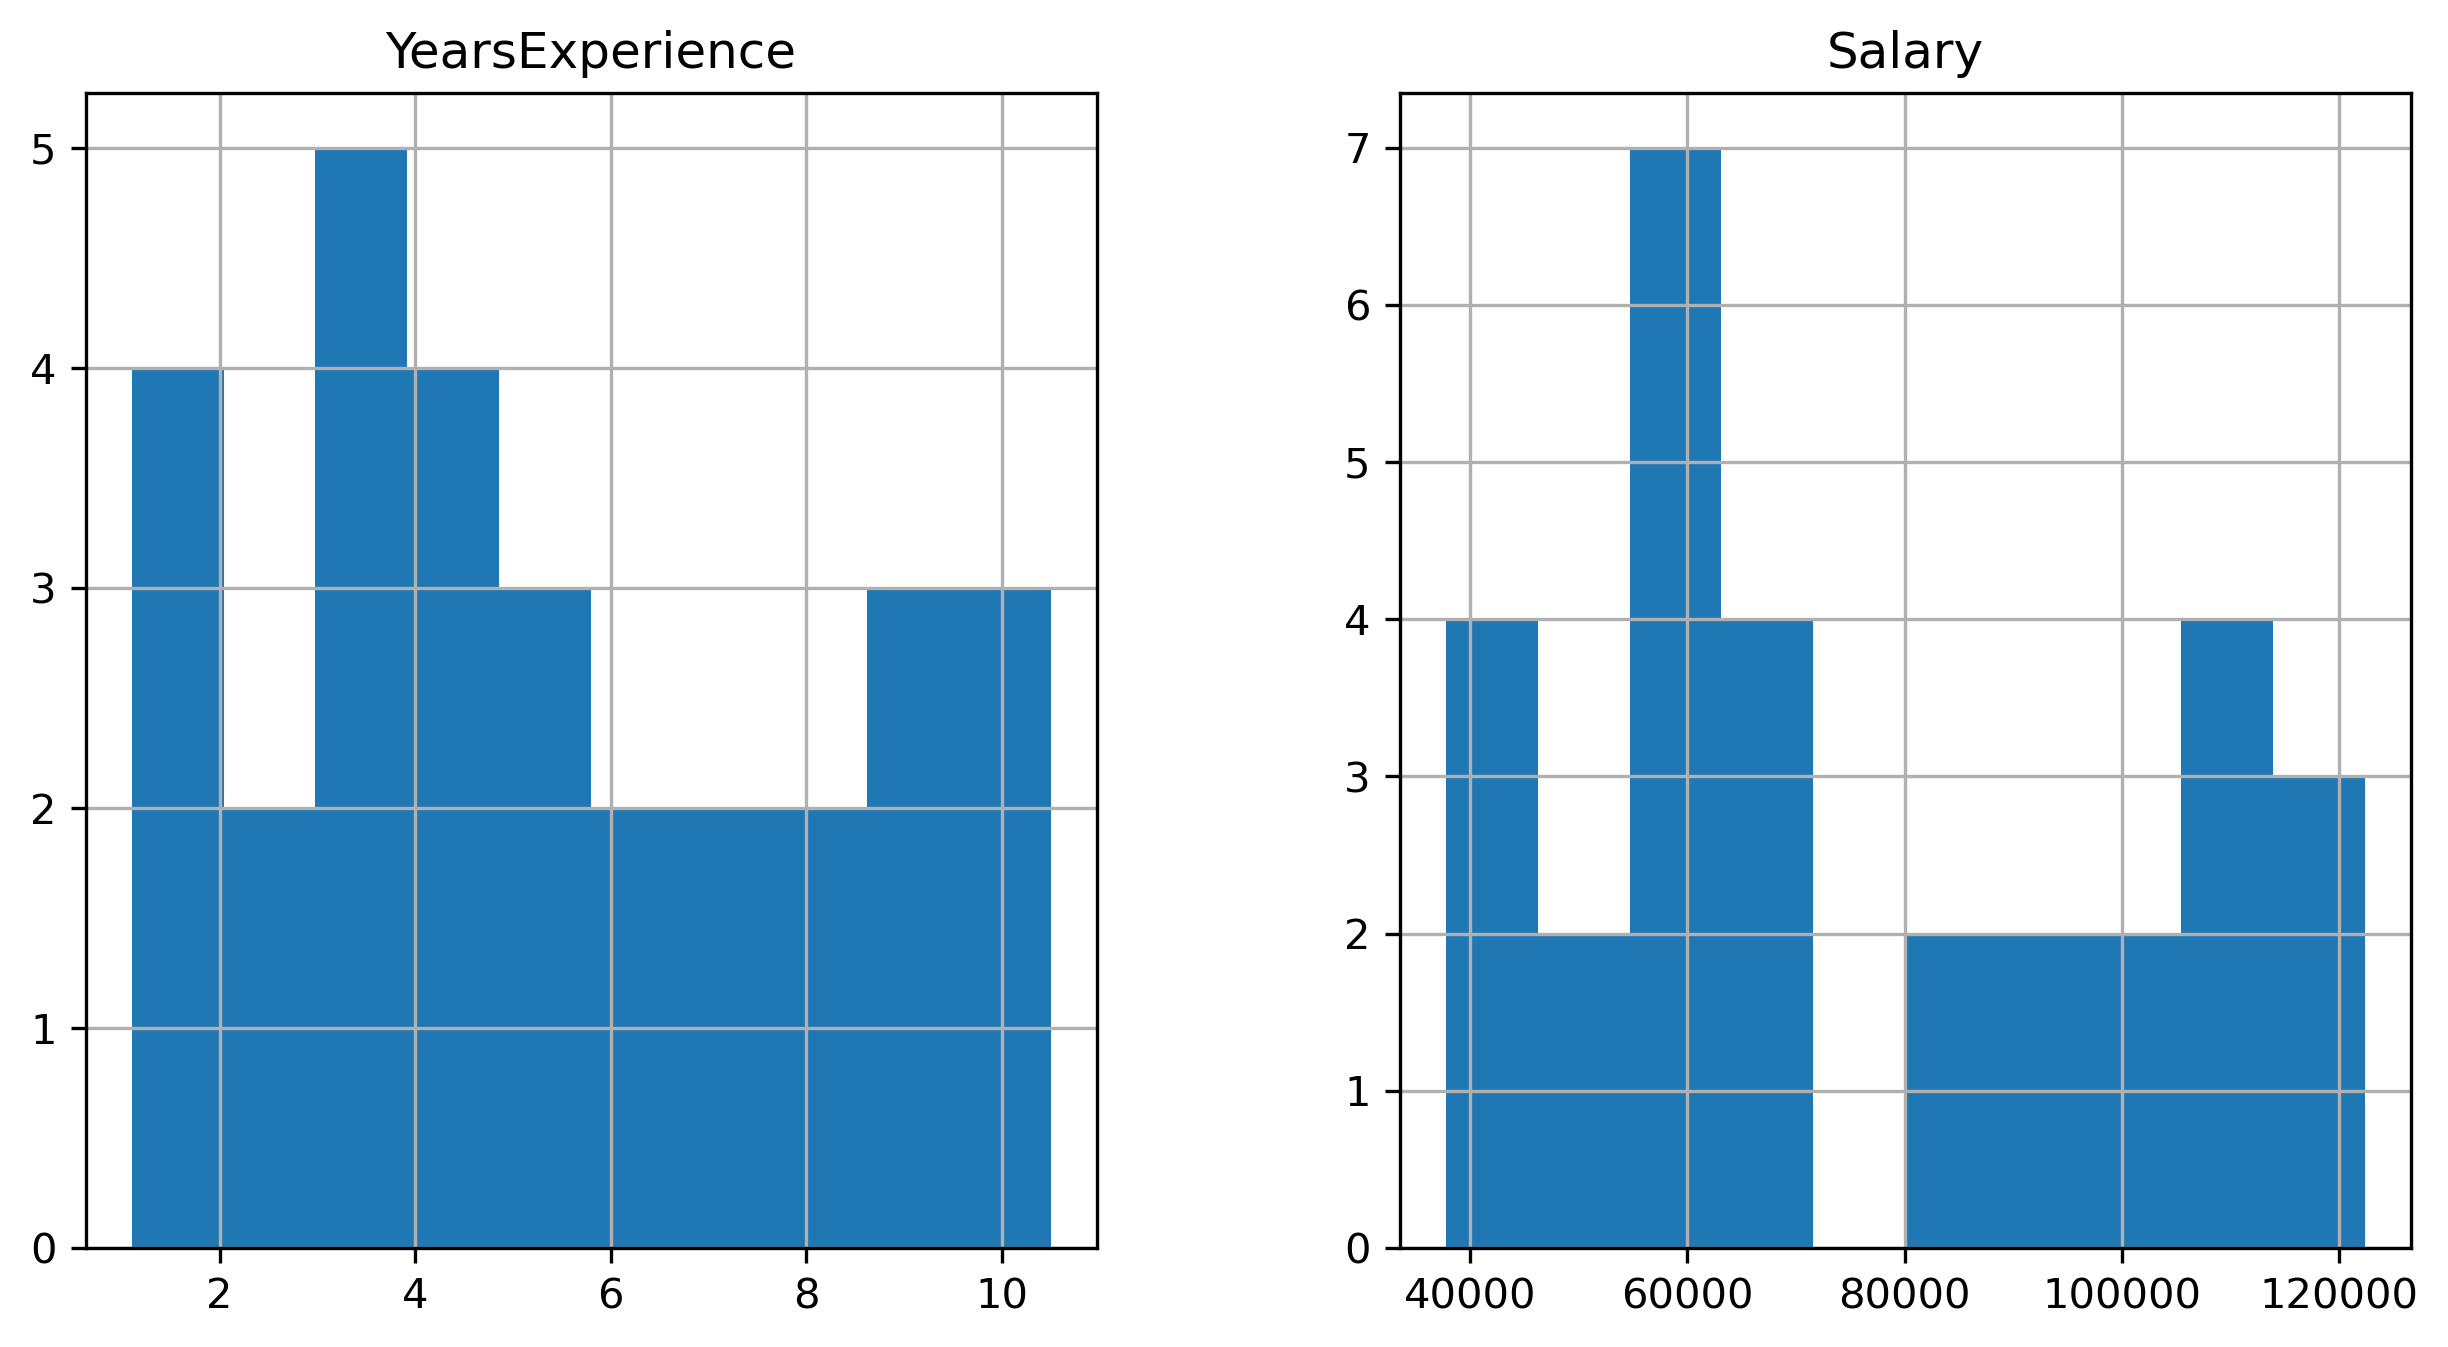

In [24]:
df.hist()

<Axes: >

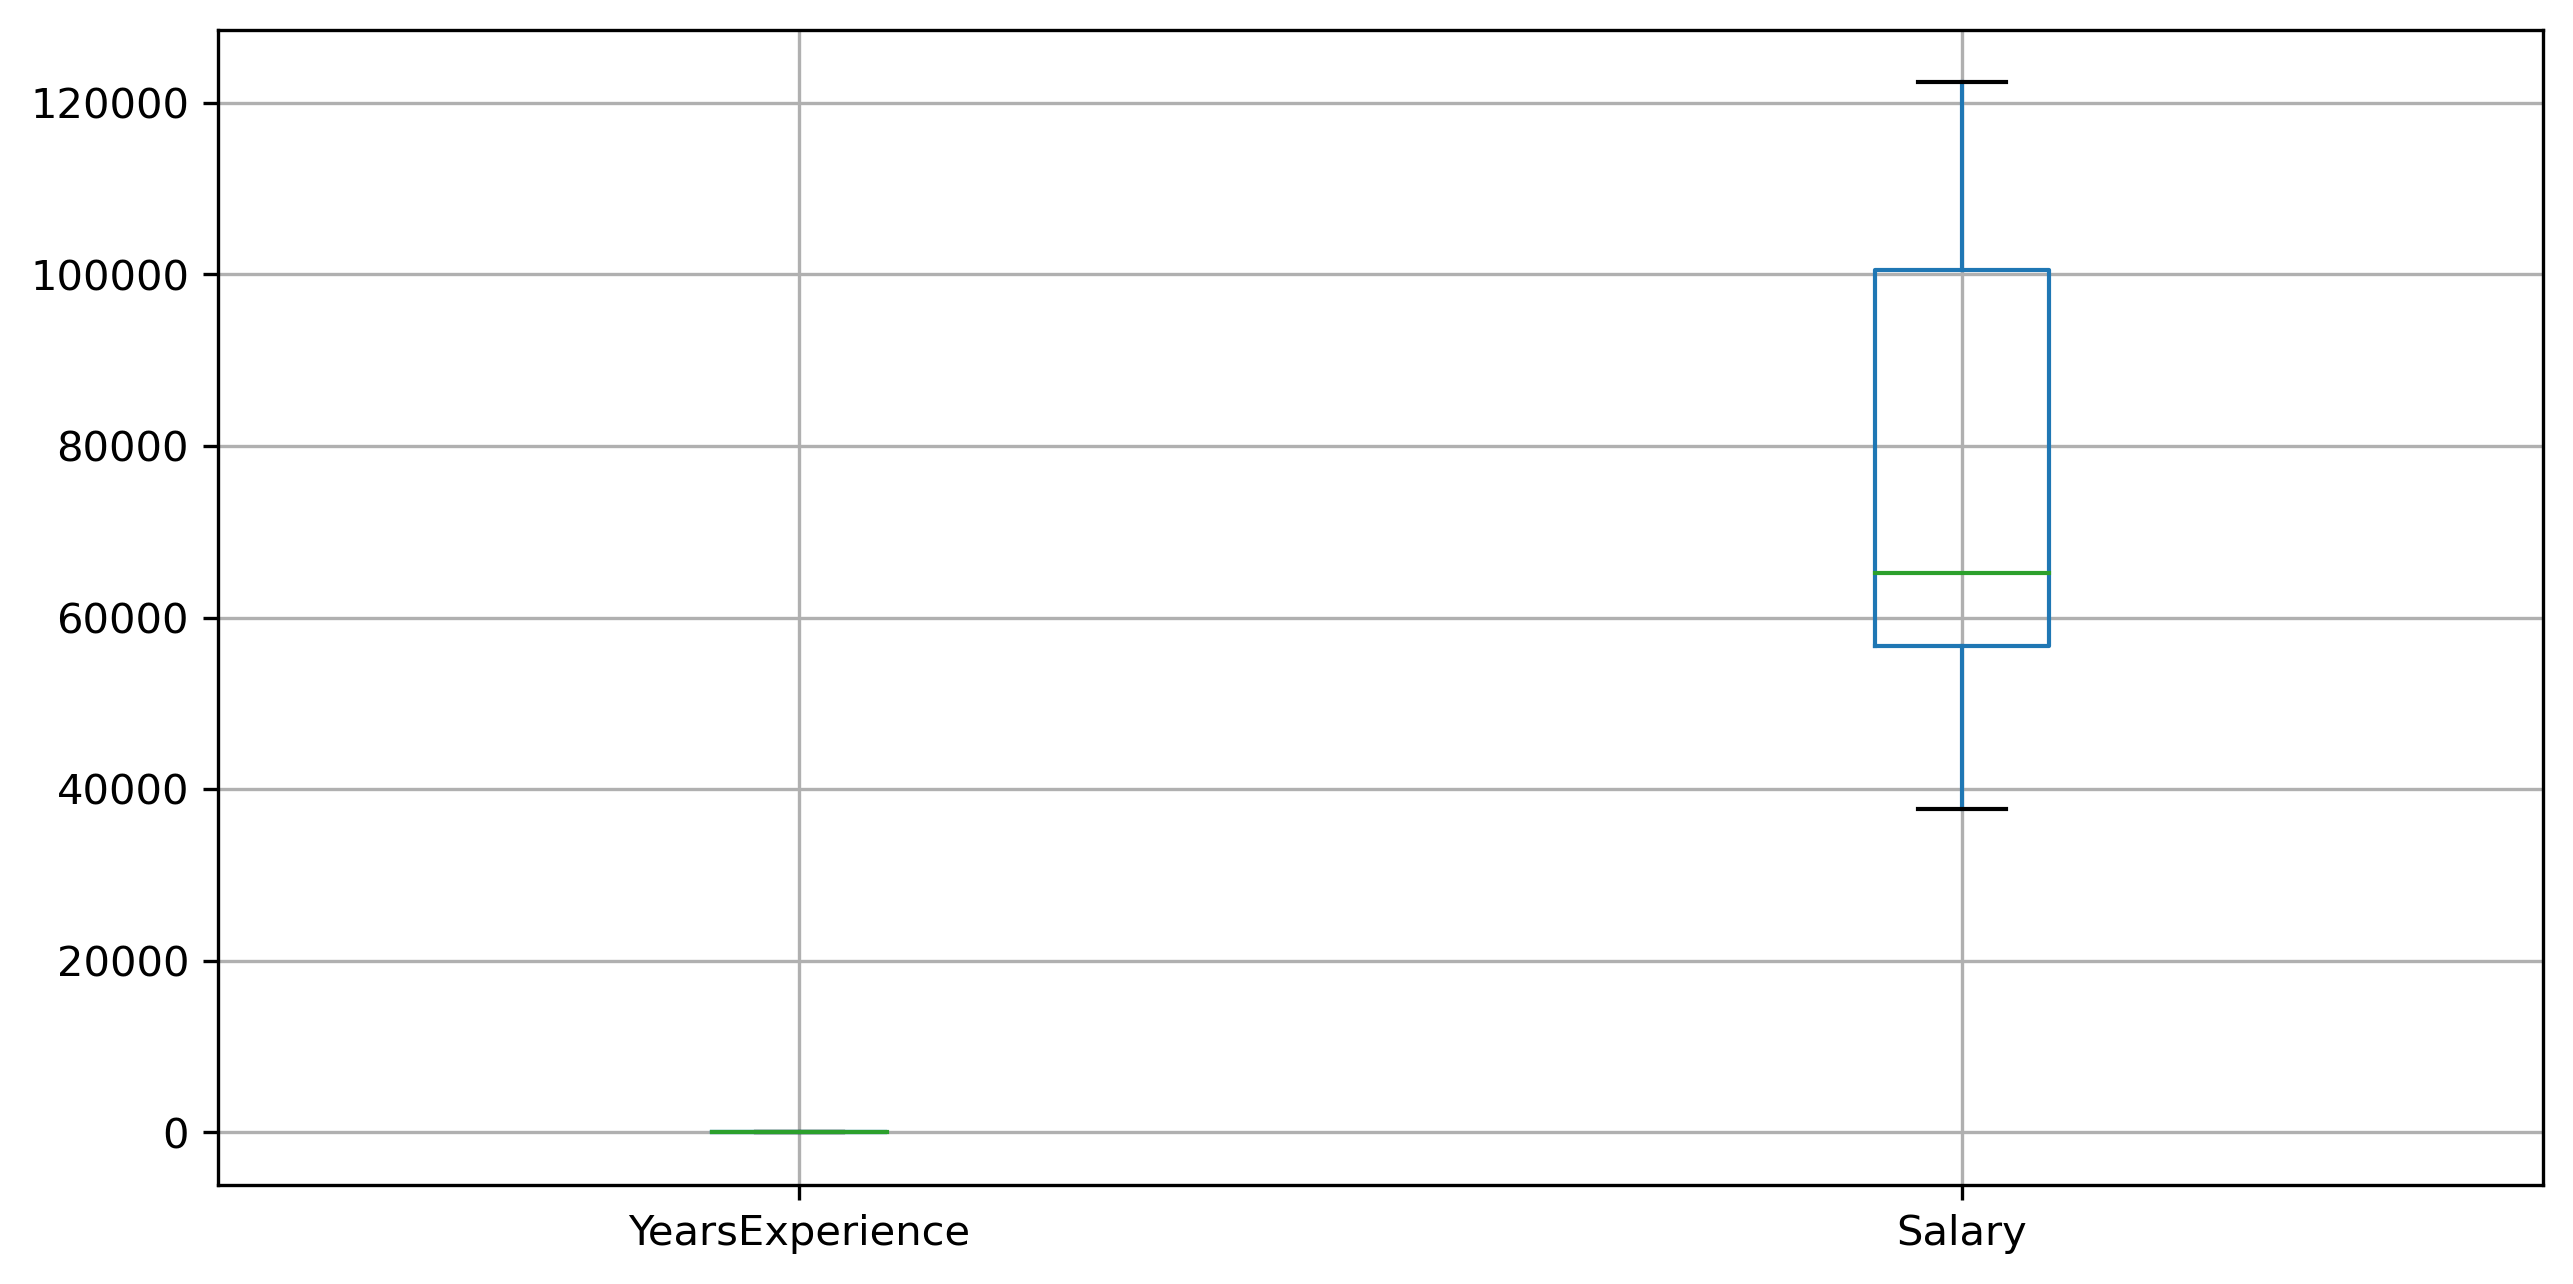

In [21]:
df.boxplot()

<Axes: xlabel='Salary', ylabel='Density'>

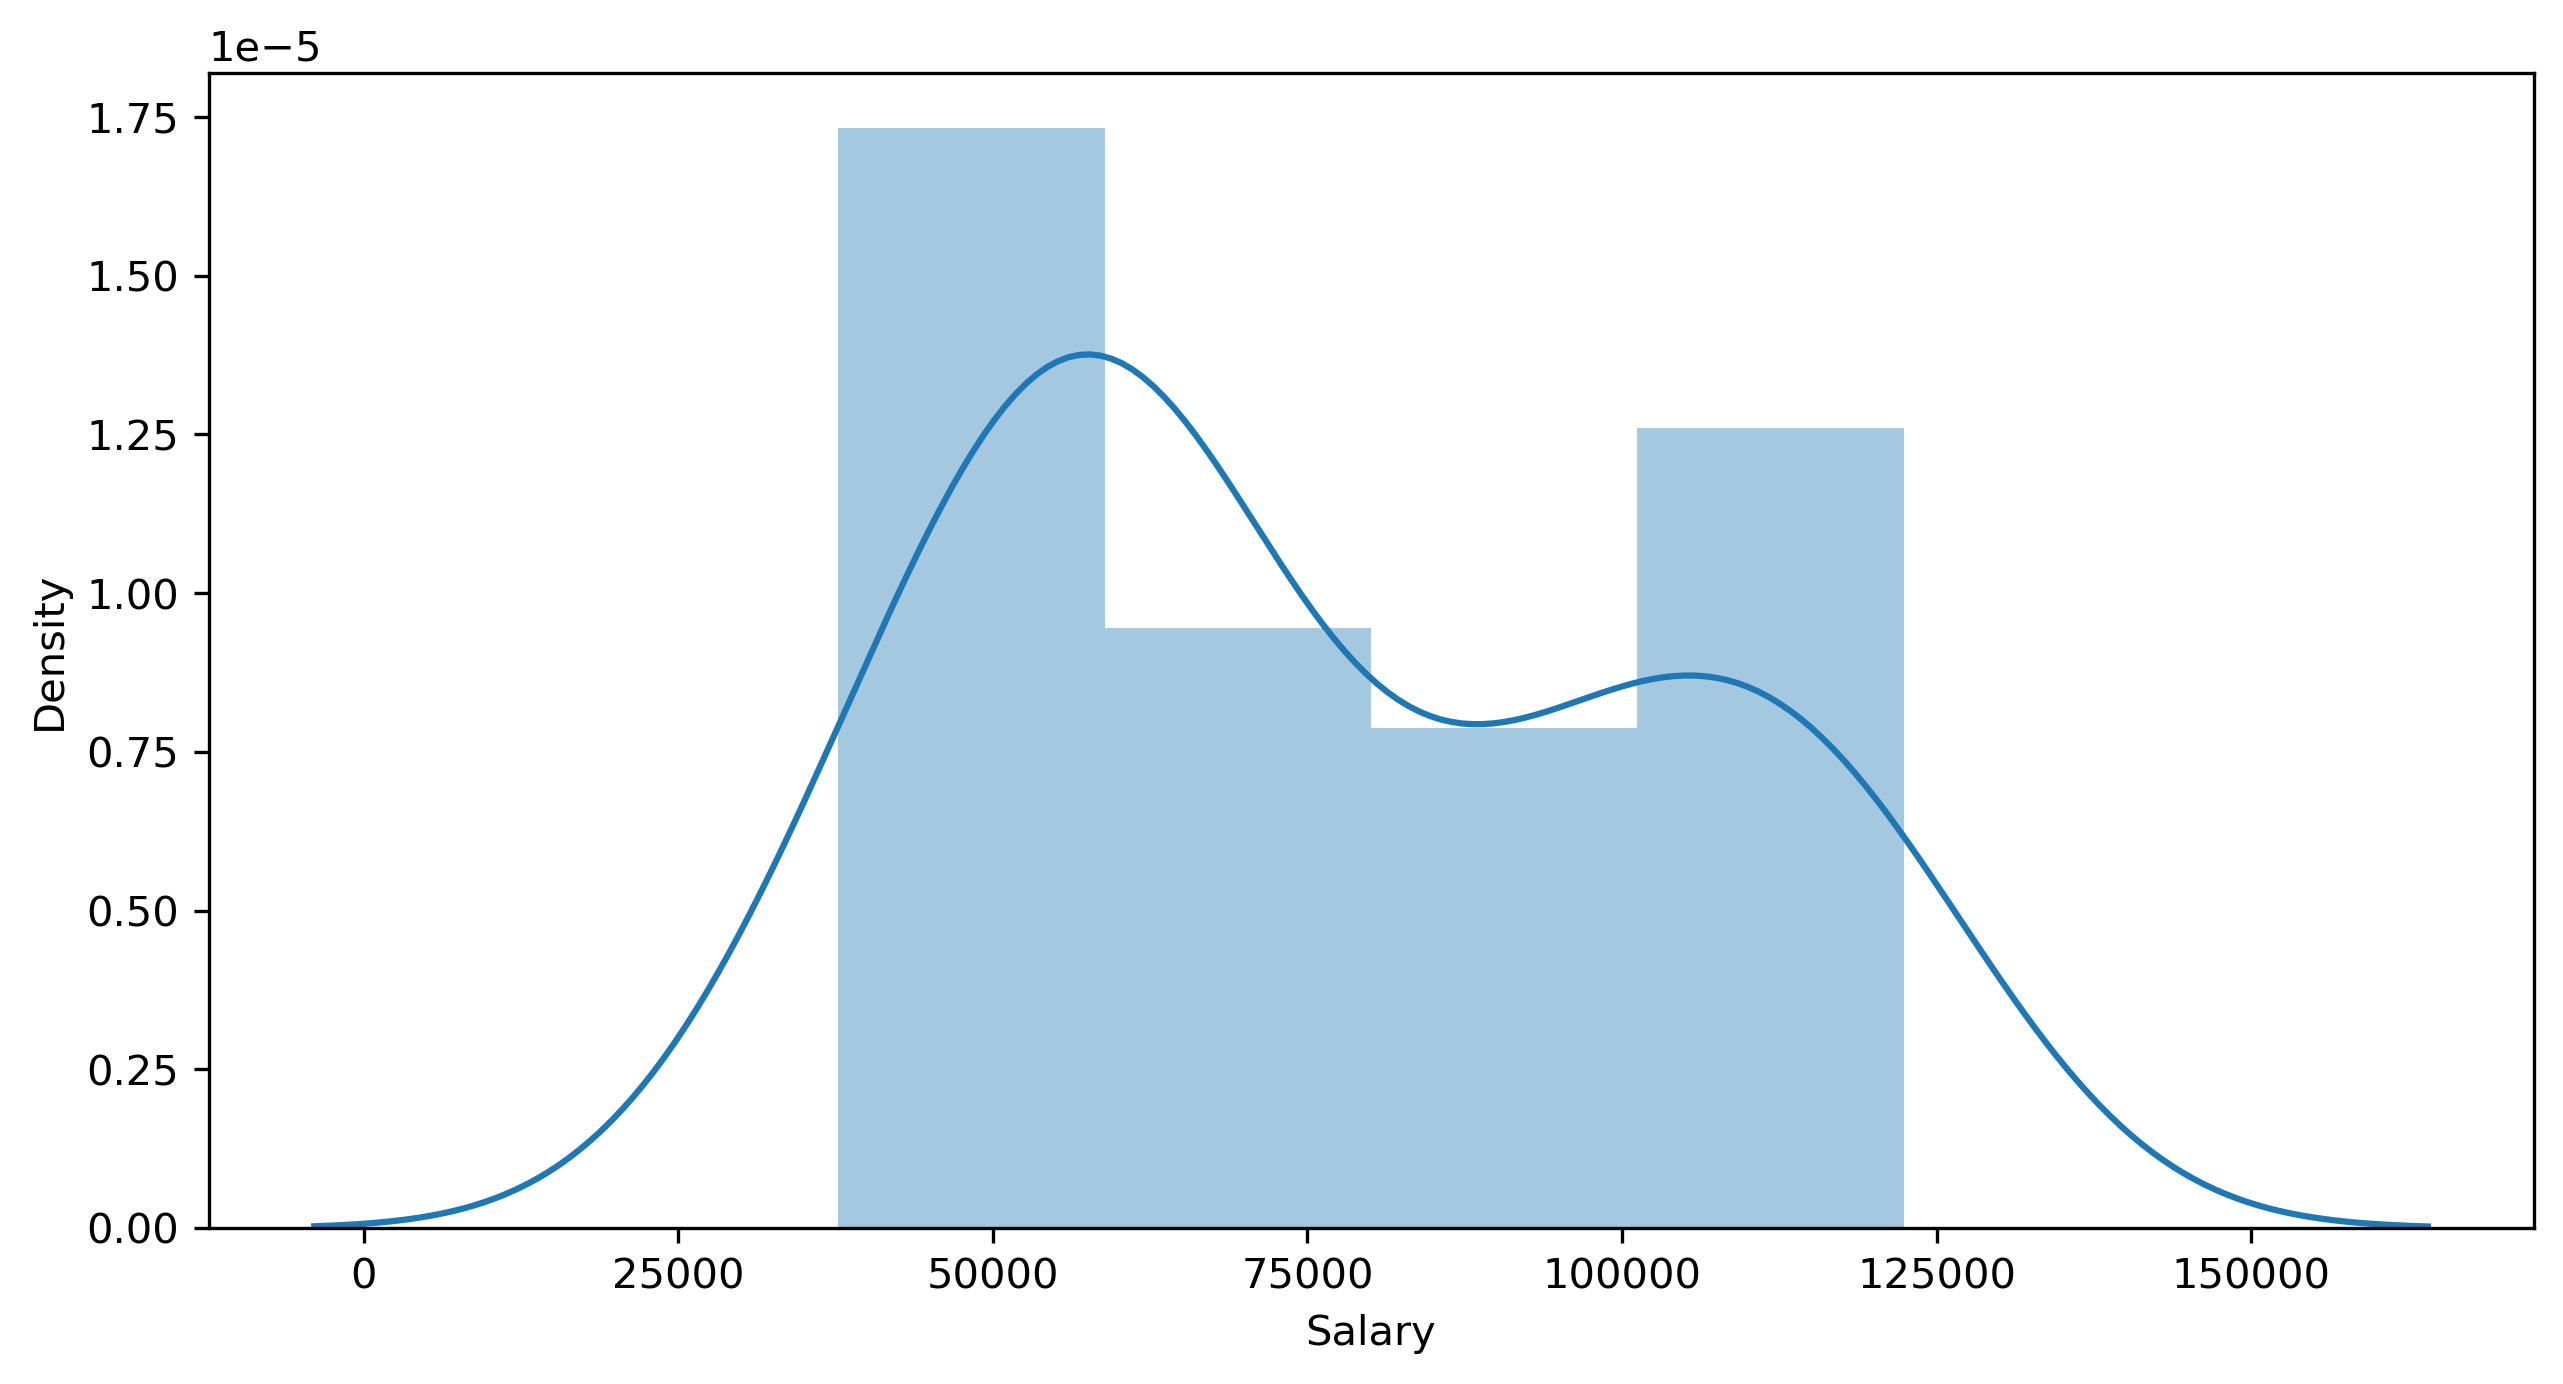

In [26]:
sns.distplot(df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

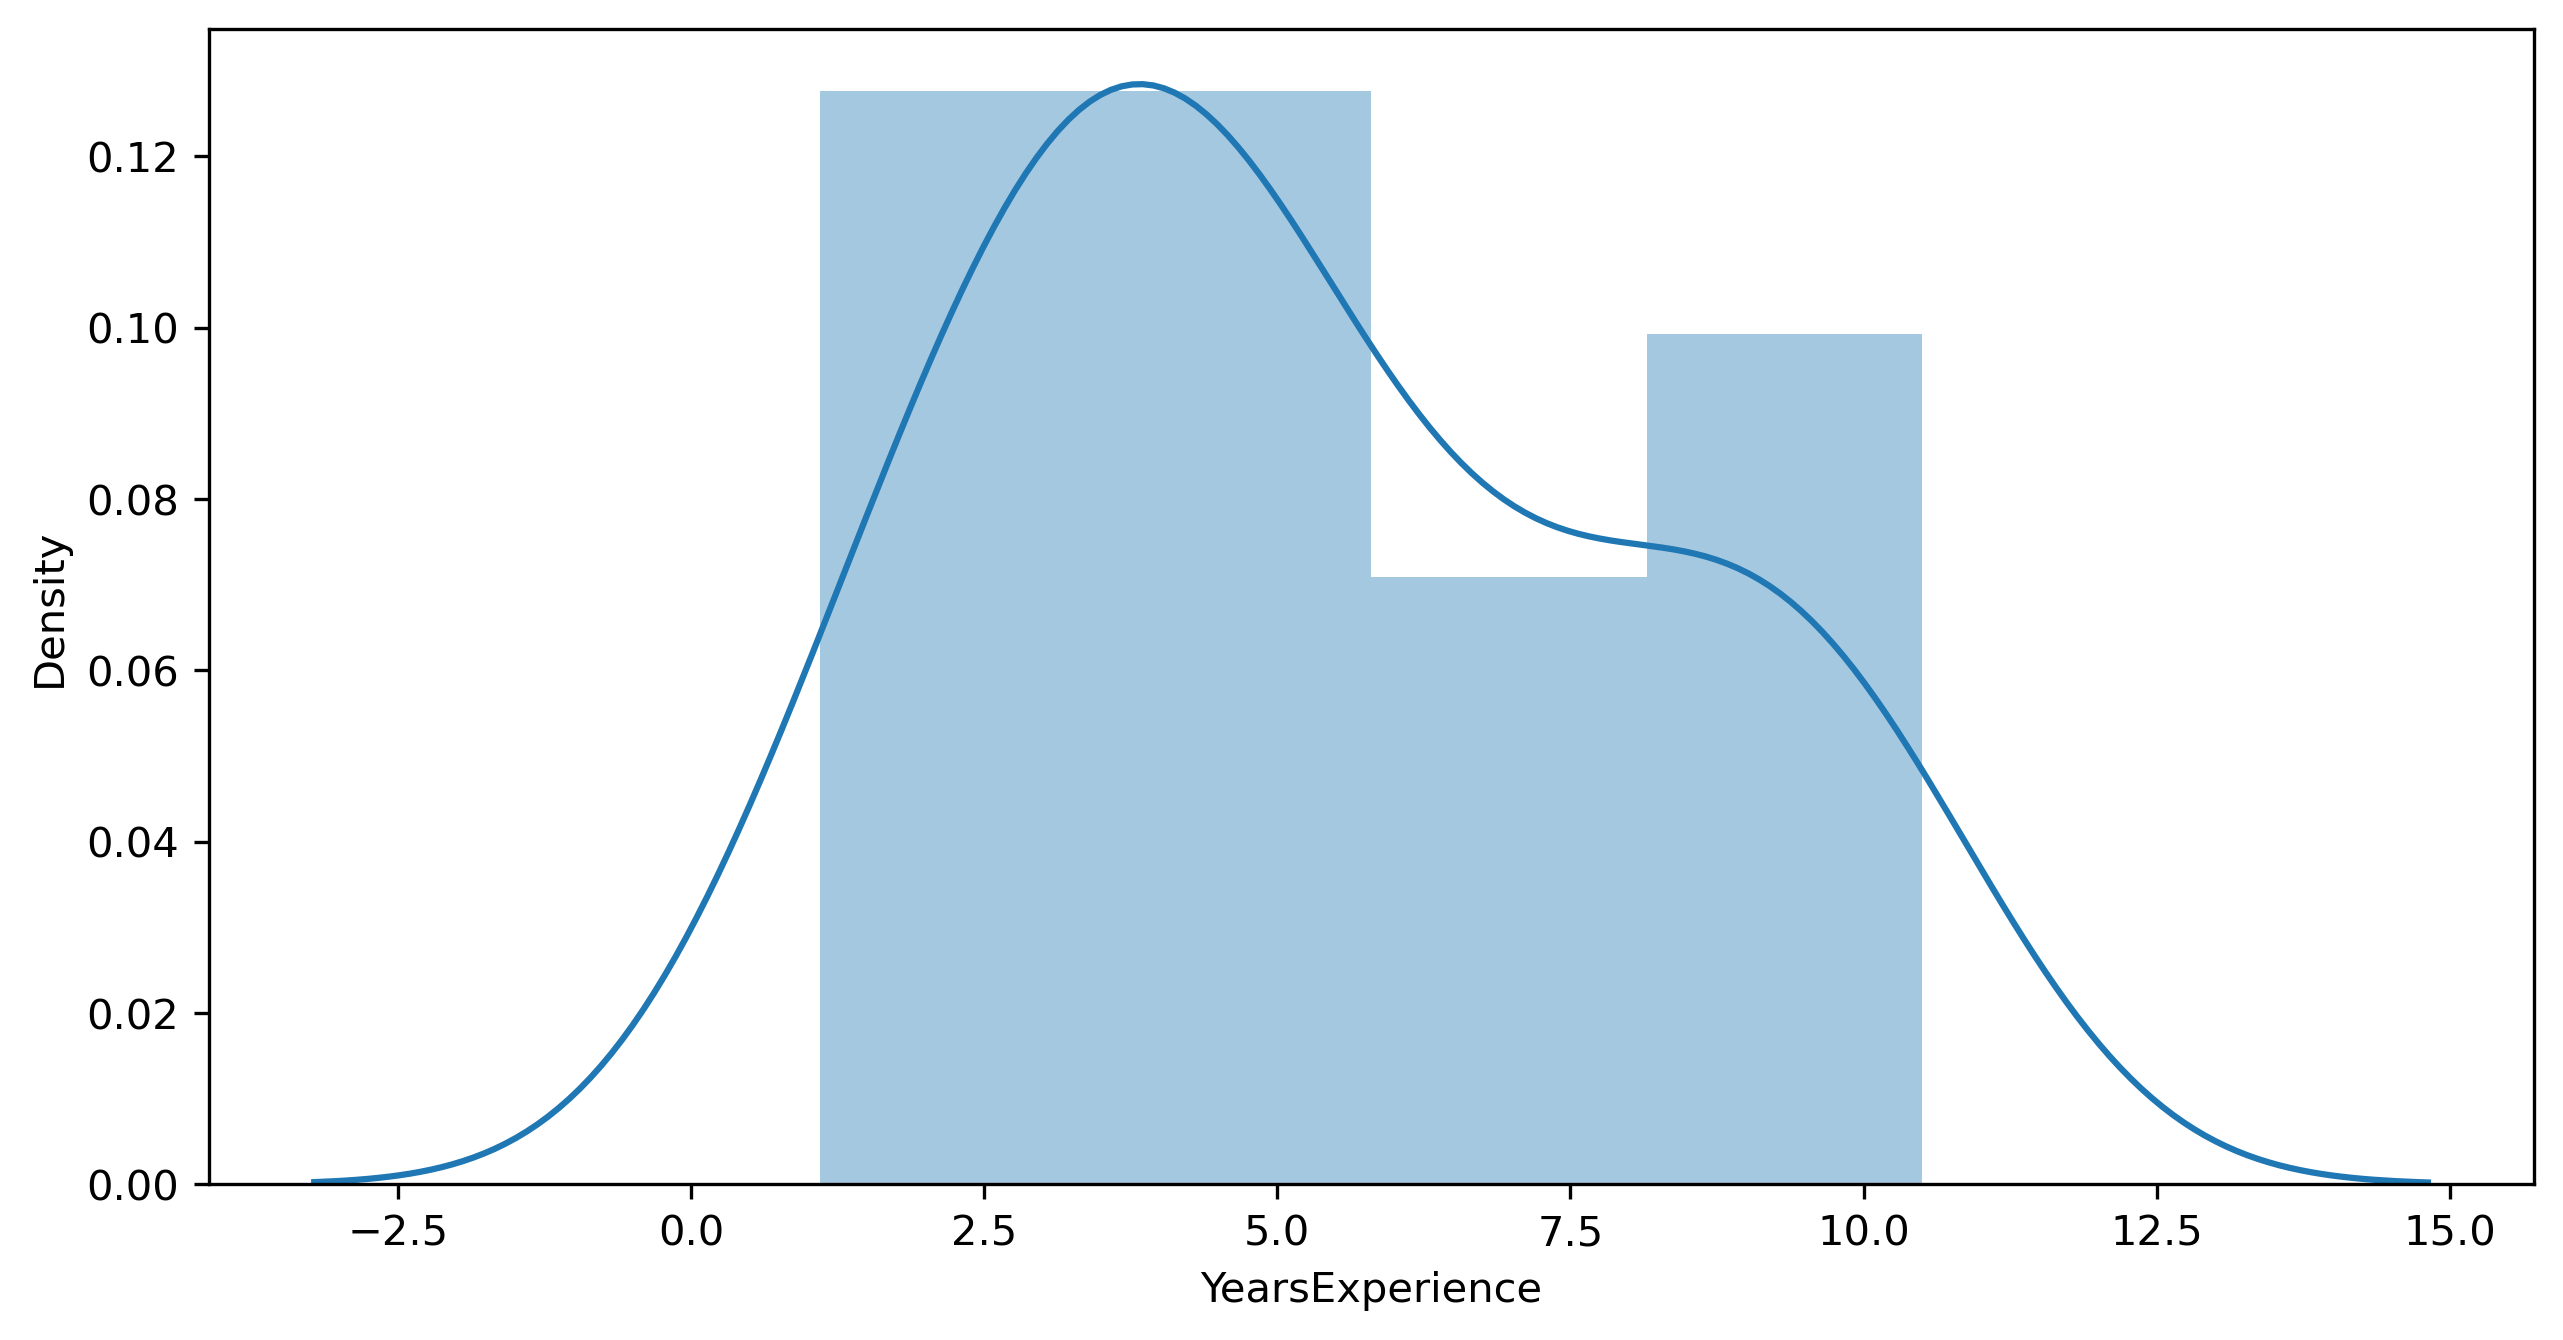

In [27]:
sns.distplot(df['YearsExperience'])

#####  <font color = 'Brown'>Upon seeing the above graphs we can say that there is no outliers in given dataset further we can check for correlation between the coloums. </font> 

#### Find the correlation between the dataset

<Axes: xlabel='YearsExperience', ylabel='Salary'>

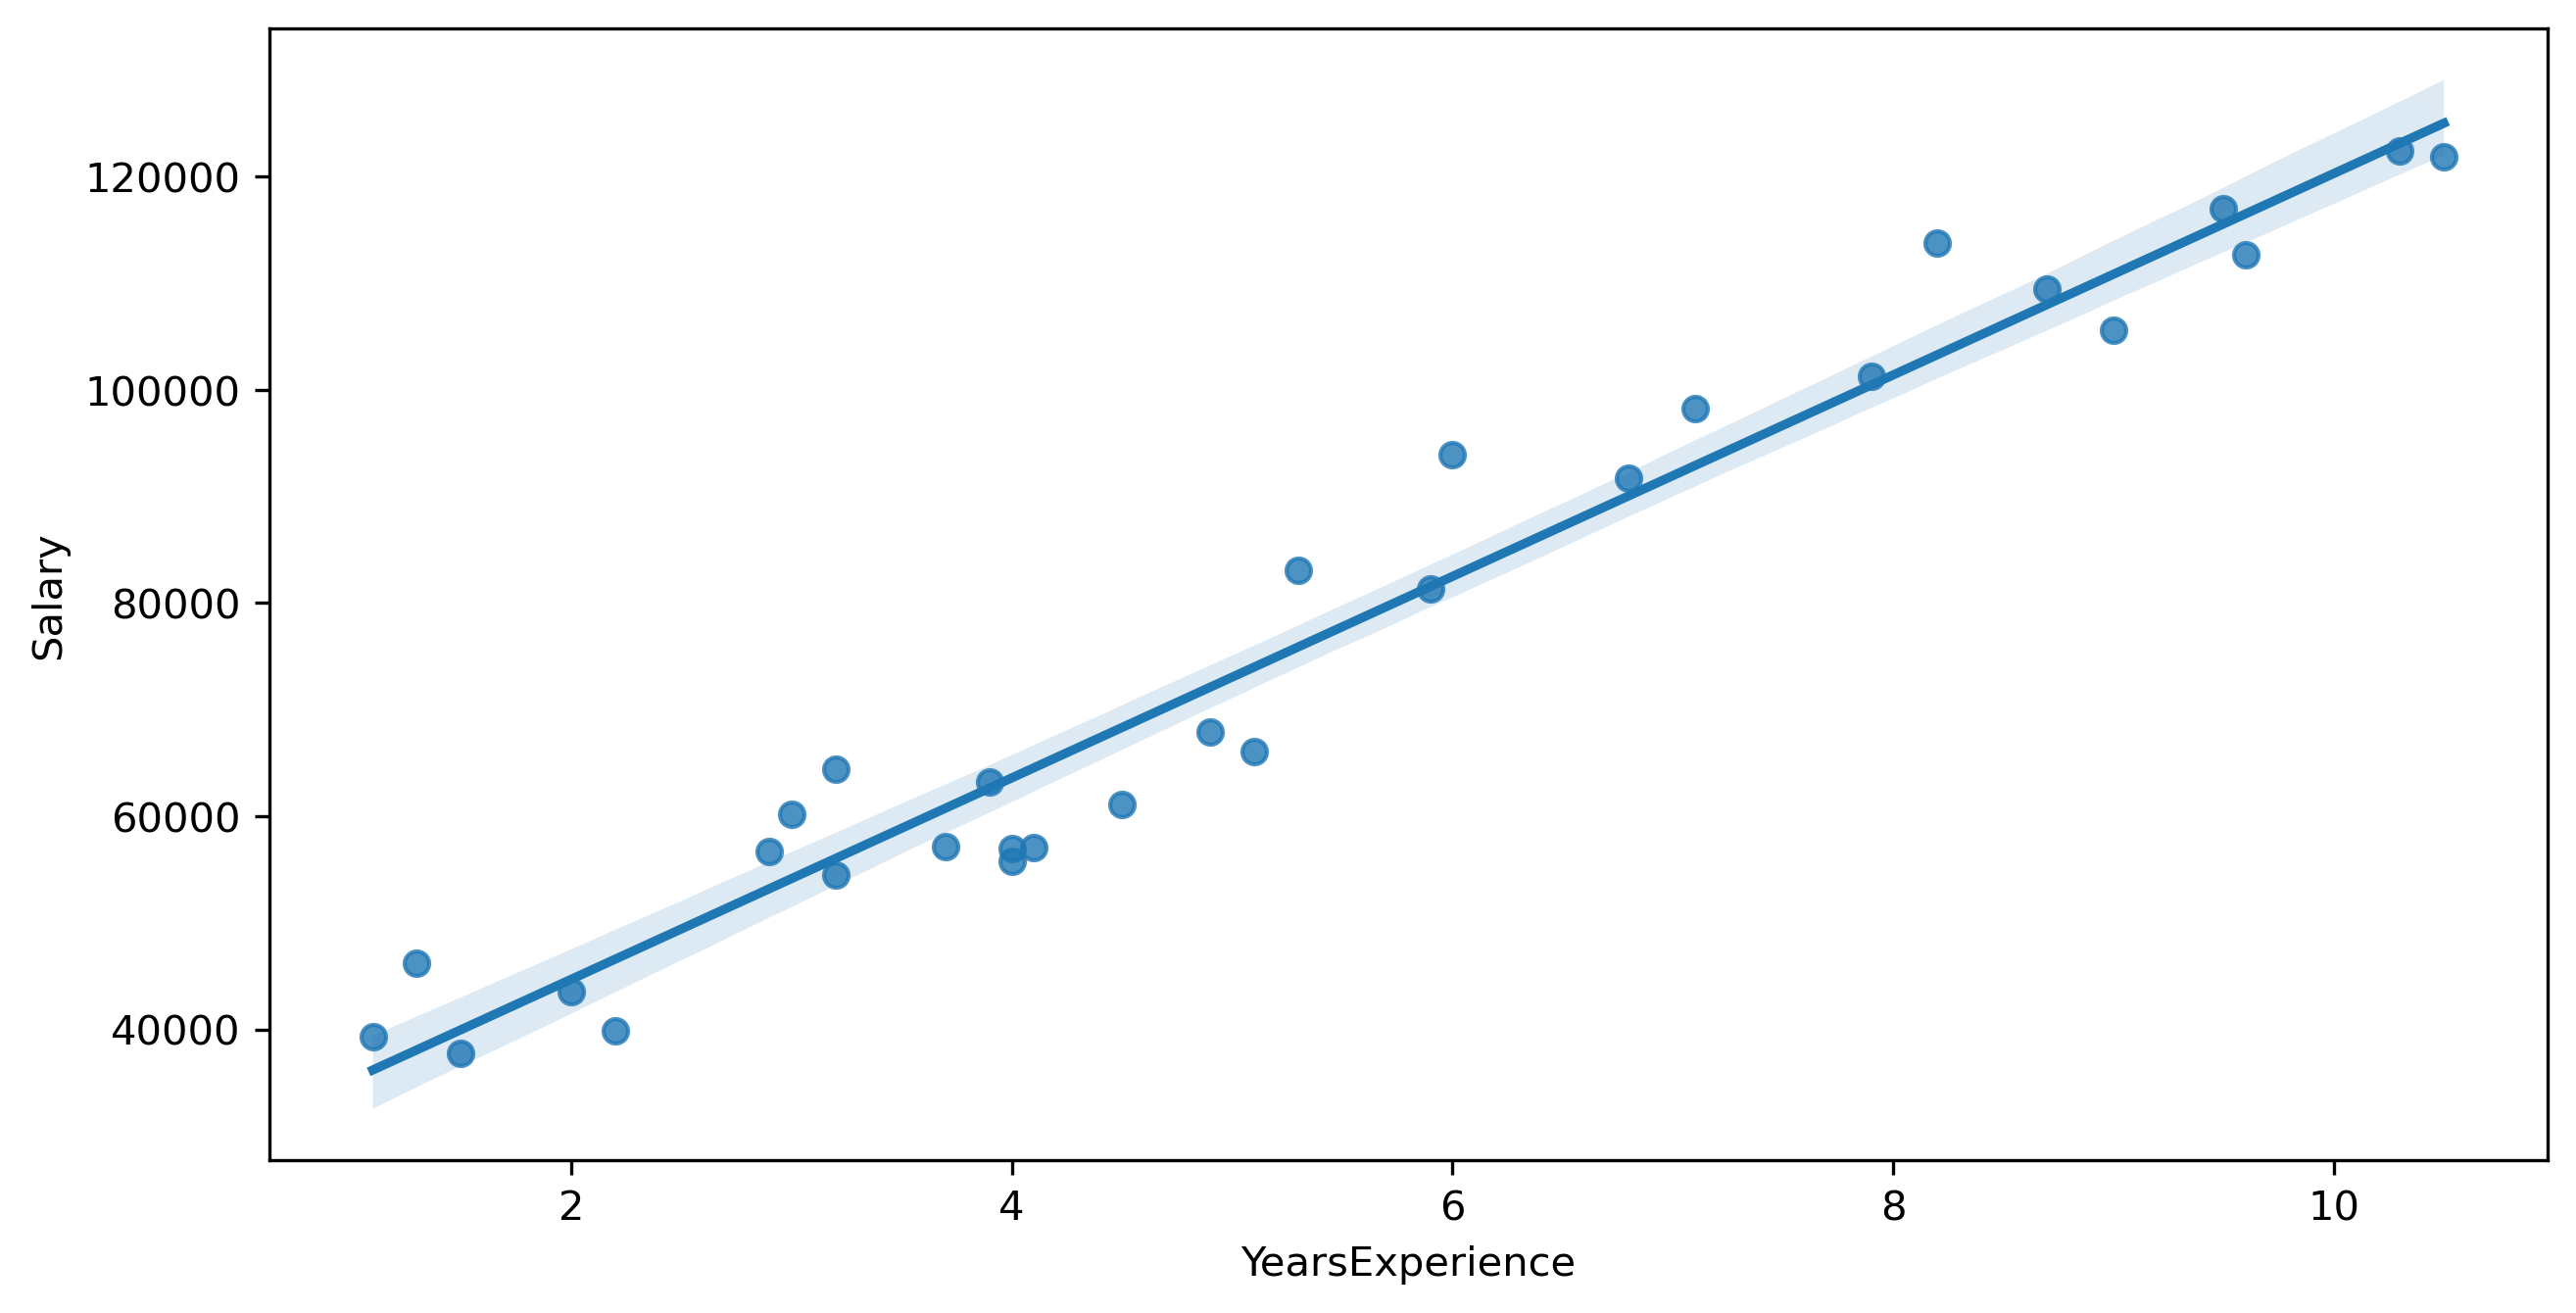

In [33]:
sns.regplot(y=df['Salary'], x=df['YearsExperience'])

In [37]:
df.corr(numeric_only= 'True')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

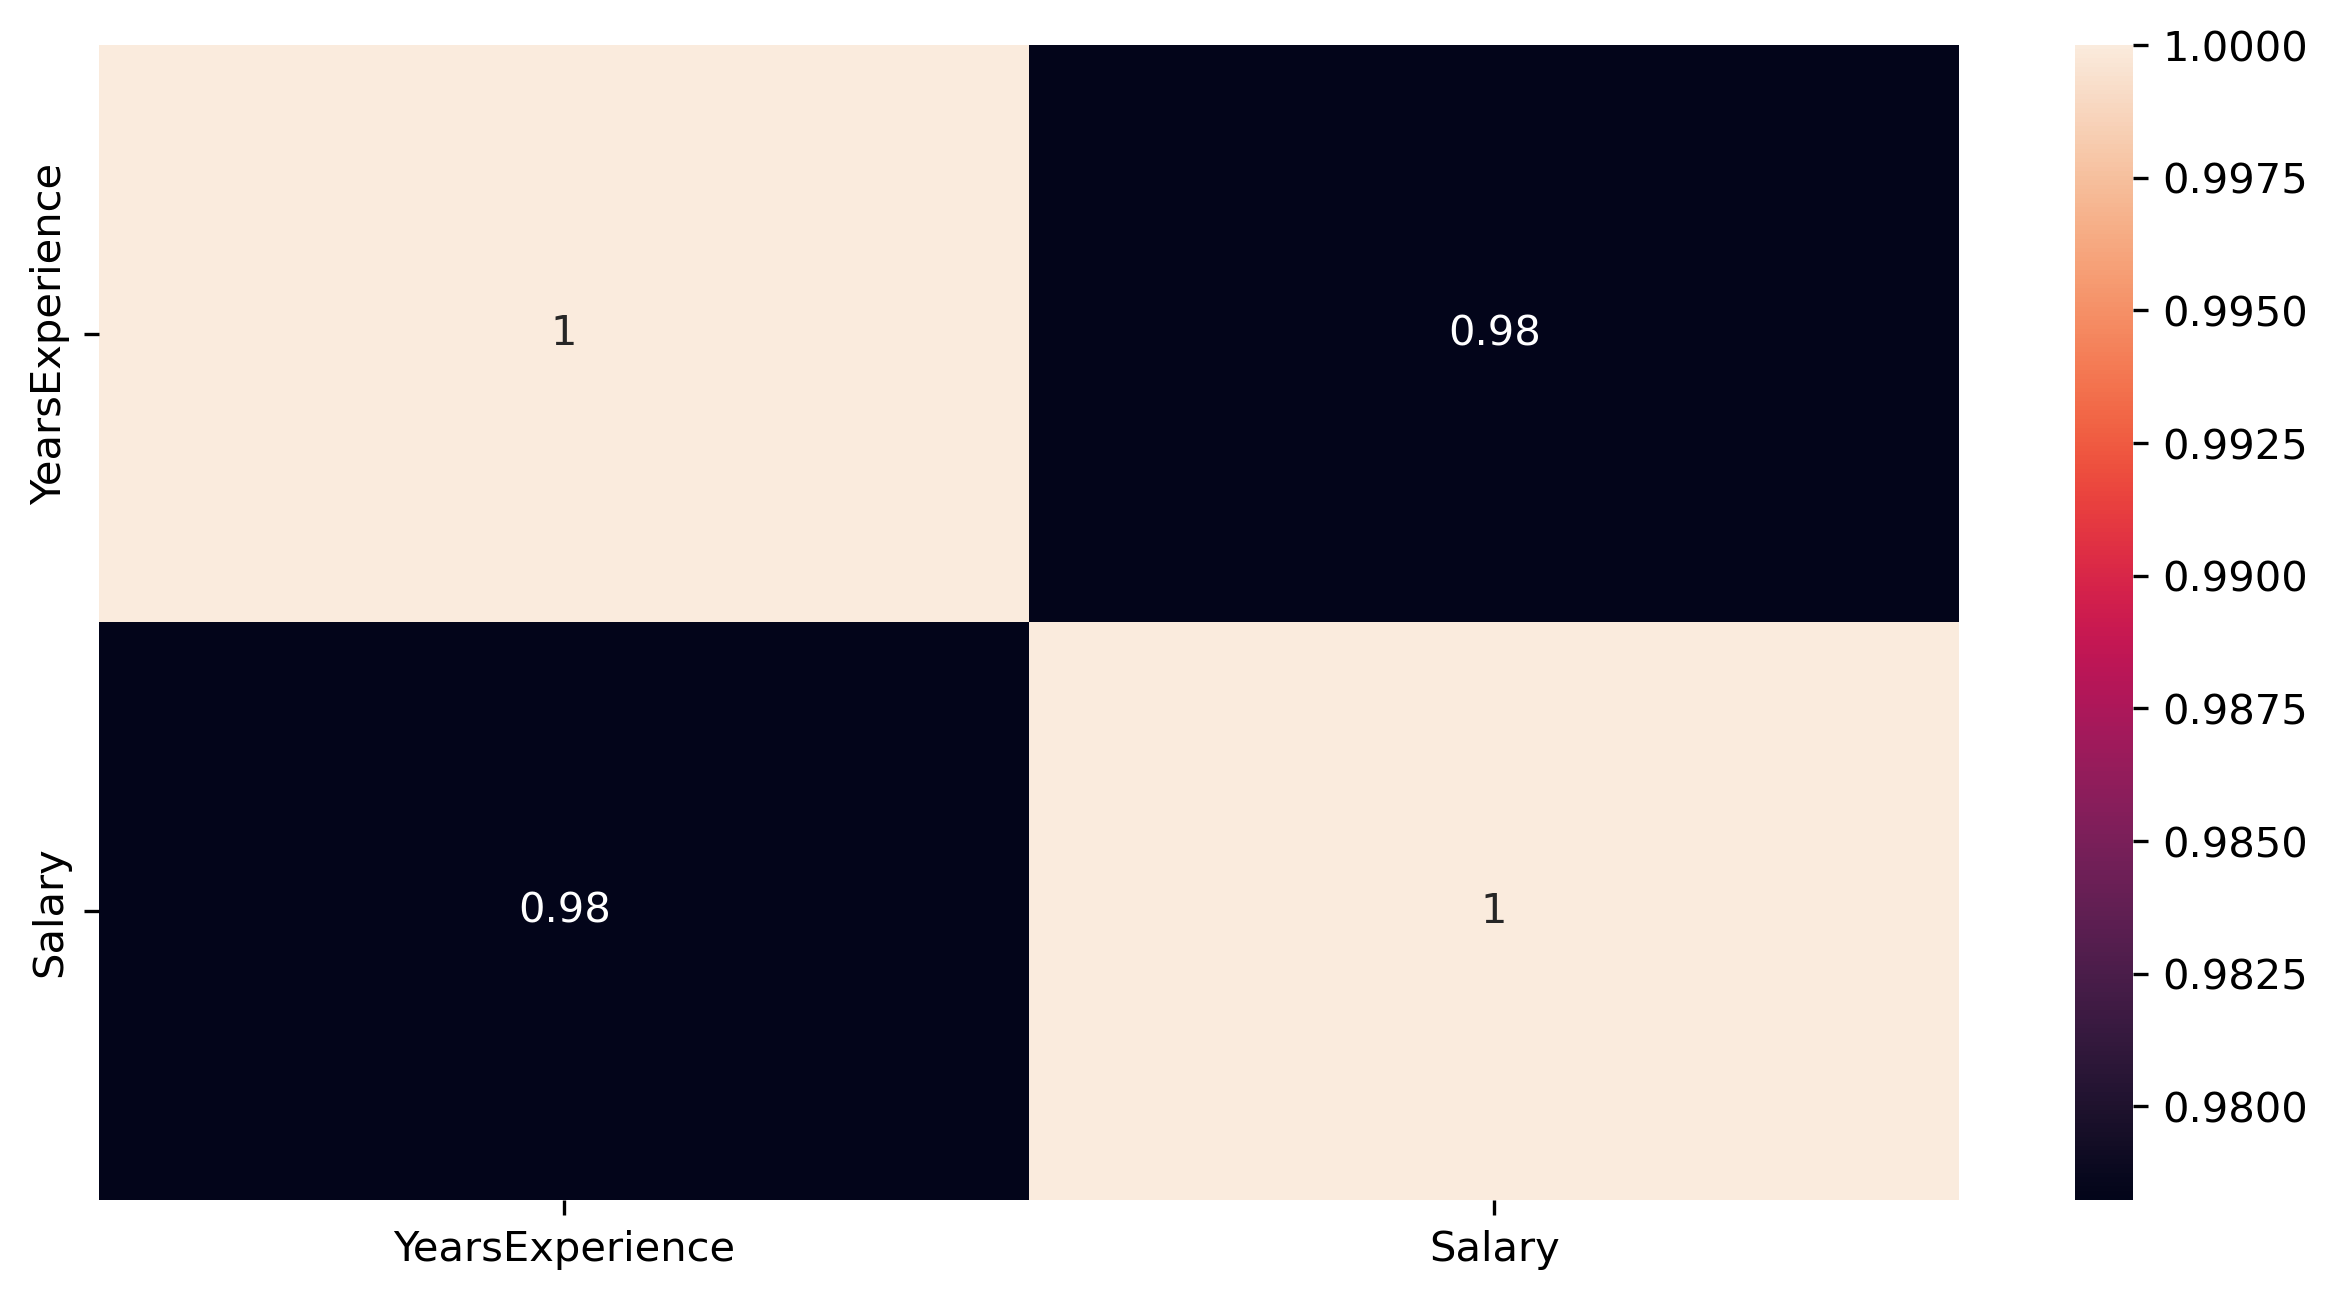

In [38]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

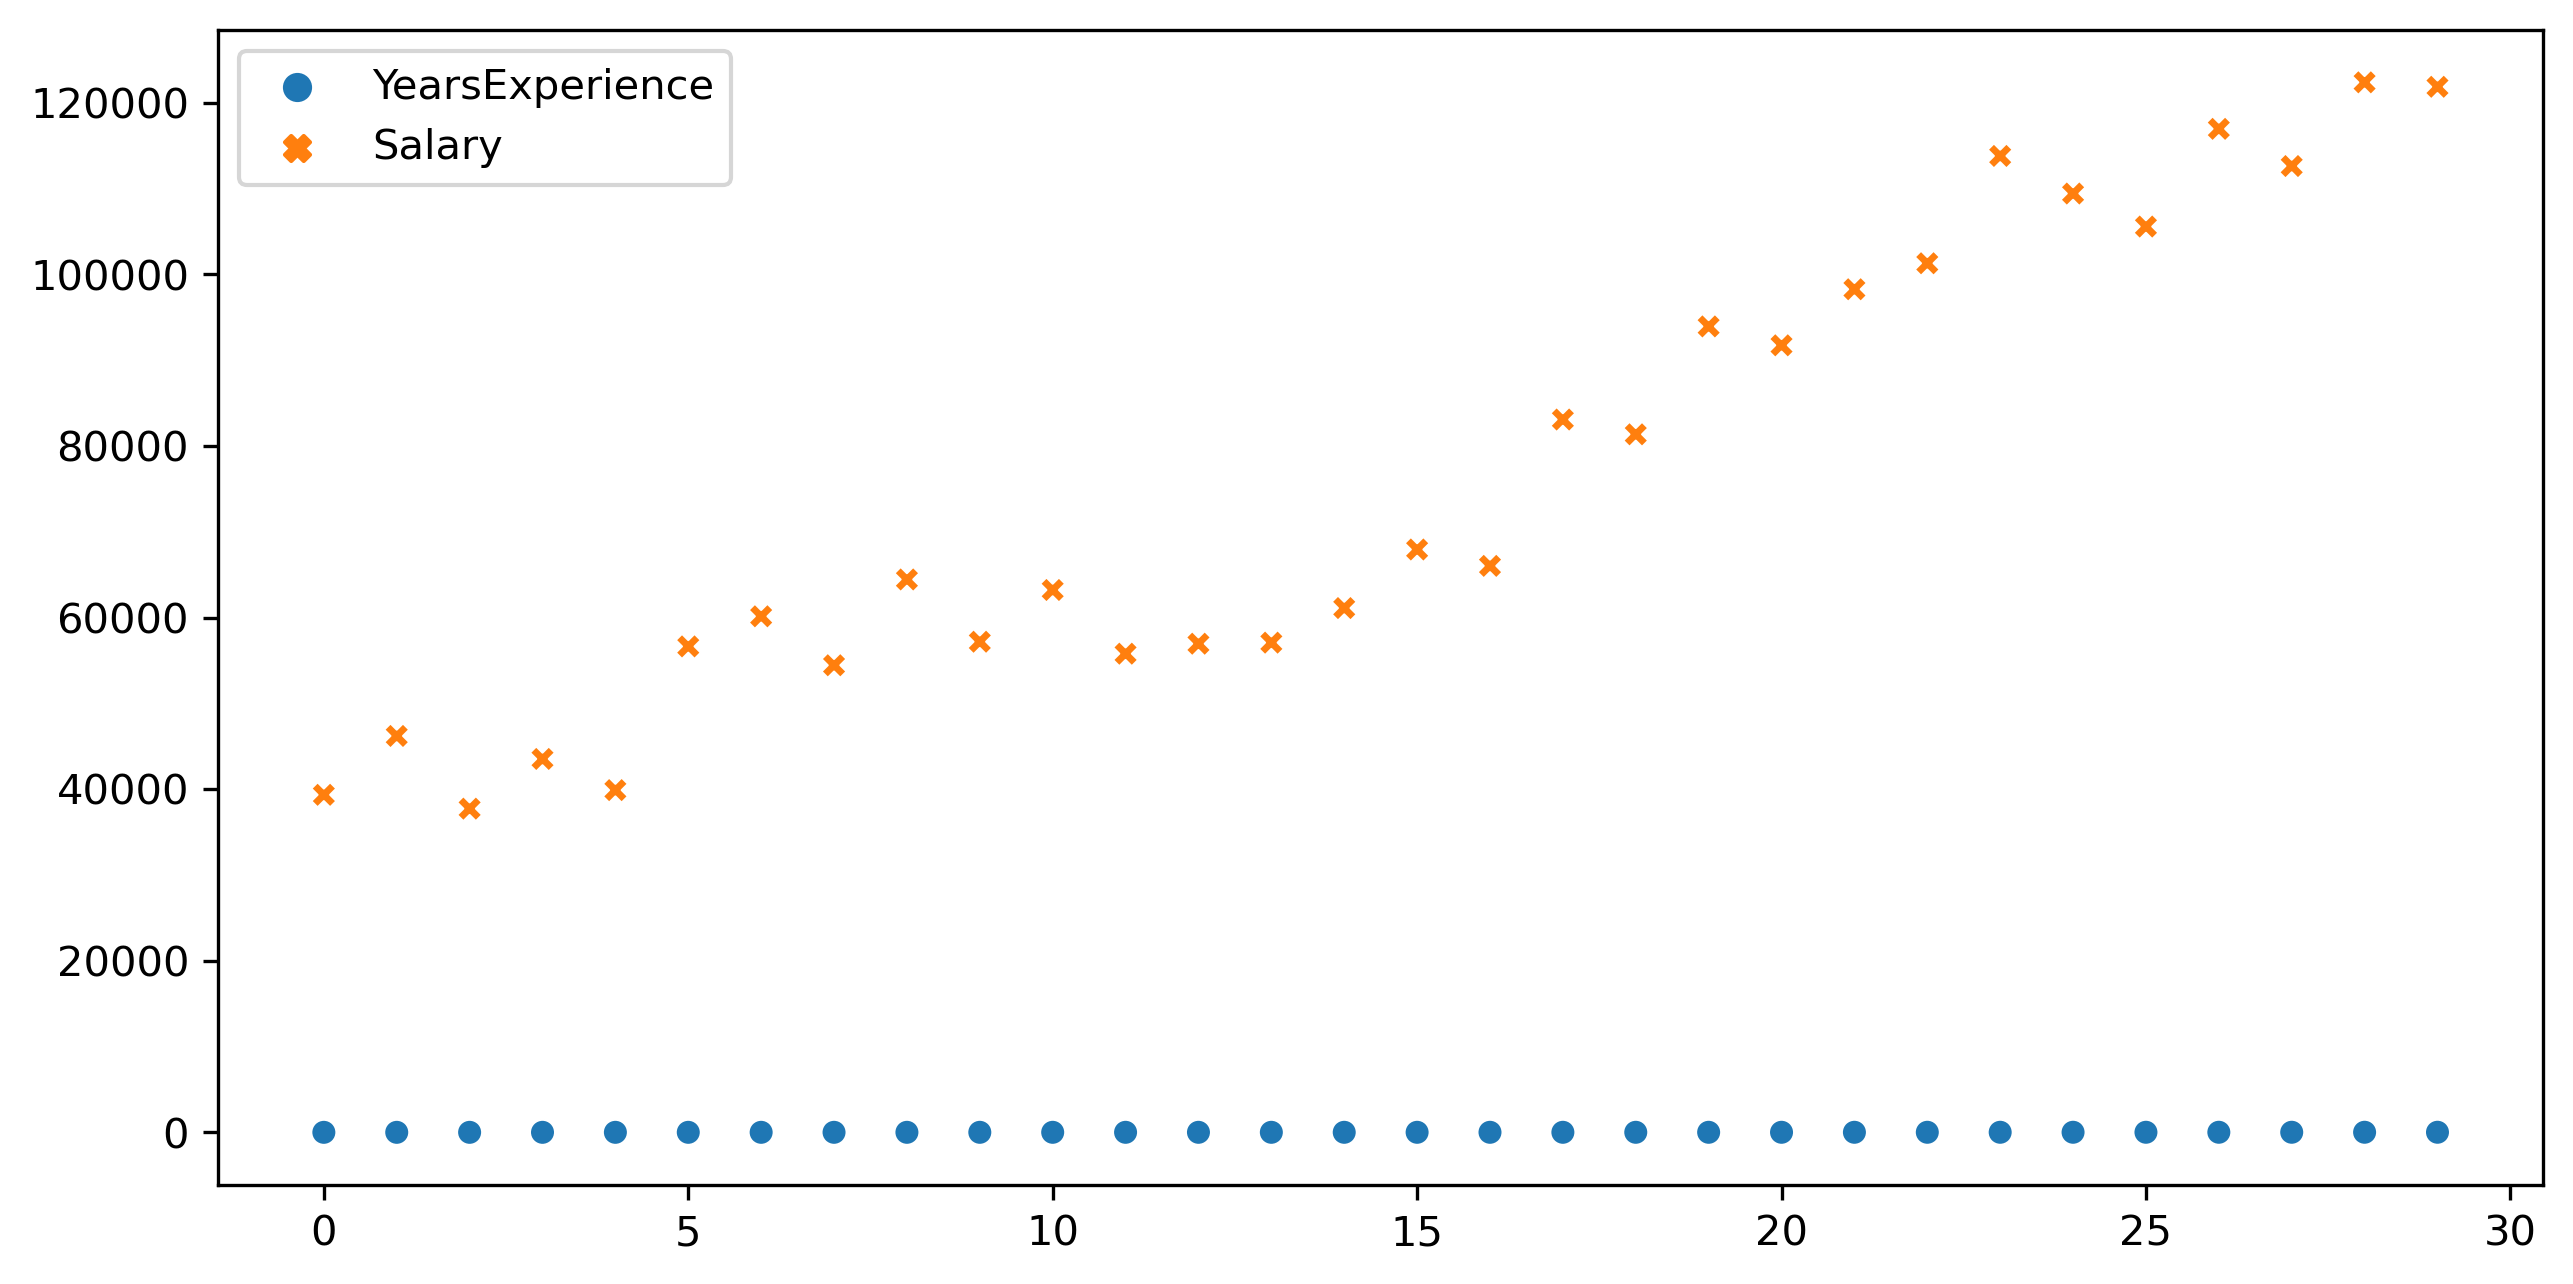

In [7]:
sns.scatterplot(df)

#### <font color = 'Brown'> From above regression plot and correlation coefficient we can say that they are having strong positive relations in between columns. The score is close to +1 which is good for positive related datas.

####  Linear Regression Model using OLS regression

In [60]:
model=smf.ols("Salary~YearsExperience",data=df).fit()
model

In [43]:
model.params  #model parameters slope and intercept

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [46]:
model.pvalues #pvalues  of model

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [47]:
#r2 value
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

##### Calculating  Salary hike for experience 5 and 8 yrs experience using model.

In [53]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [56]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,8


In [57]:
model.predict(data_pred)

0     73042.011806
1    101391.898770
dtype: float64

##### <font color='Green'>Above are the predicted  Salaries by model.